In [1]:
using Revise, Plots, LinearAlgebra, LaTeXStrings, Random

In [2]:
includet("../../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain = [0, 1]

x0 = [0.2, 0.35, 0.65]
a0 = [1.0, 1.0, -1.0]

μ0 = DiscreteMeasure(x0, a0)

DiscreteMeasure([0.2, 0.35, 0.65], [1.0, 1.0, -1.0], 1, 3)

In [4]:
# Define the number of Fourier coefficients
fc = 4
n = 2fc + 1

# Define noise level
noise_level = 0.1

# Seed for noise
Random.seed!(12)

TaskLocalRNG()

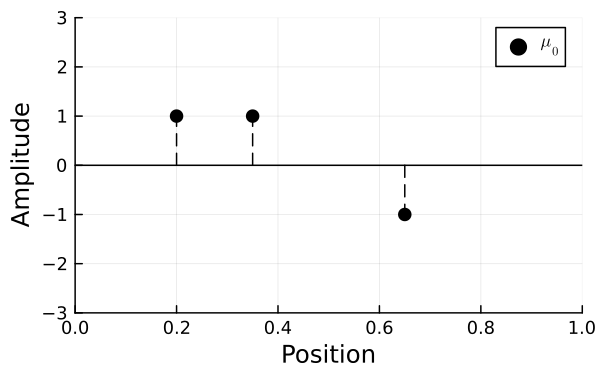

In [14]:
n_coarse_grid = 21
n_plt_grid = 1001

coarse_grid = grid(domain, n_coarse_grid)
plt_grid = grid(domain, n_plt_grid)

plot_size = (400, 250) .* 1
plt = plot(xlims=extrema(domain), ylims=(-3, 3), xlabel="Position", ylabel="Amplitude", legend=:topright, size=plot_size, dpi=150, bg=:White)
hline!(plt, [0], linestyle=:solid, color=:black, label="")

plt_spikes = deepcopy(plt)
plot_spikes!(plt_spikes, μ0, color=:black, label=L"μ_0", marker=:circle, markersize=5, markerstrokewidth=0)
for (xi, ai) in zip(μ0.x, μ0.a)
    plot!(plt_spikes, [xi, xi], [0, ai], linestyle=:dash, color=:black, label="")
end
plt_spikes

In [17]:
# ops = fourier_operators_1D(fc, plt_grid)
ops = gaussian_operators_1D(0.08, coarse_grid)

Operators(var"#ϕ#23"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Int64}(0.0:0.05:1.0, Core.Box(var"#gauss1D#22"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64, Int64, Float64}(0.0:0.05:1.0, 0.3526184897173477, Core.Box(#= circular reference @-2 =#), 21, 156.25)), 21), var"#Φ#24"{var"#ϕ#23"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Int64}}(var"#ϕ#23"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Int64}(0.0:0.05:1.0, Core.Box(var"#gauss1D#22"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64, Int64, Float64}(0.0:0.05:1.0, 0.3526184897173477, Core.Box(#= circular reference @-2 =#), 21, 156.25)), 21)), var"#adjΦ#25"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#adjΦ#21#26"{var"#ϕ#23"{StepRangeLen{Float64, Bas

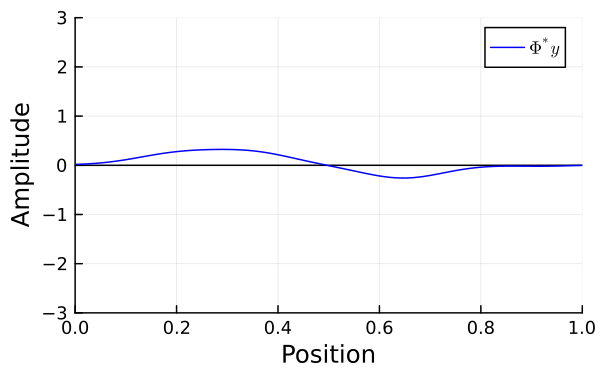

In [26]:
# Calculate the observation y0 = Φμ0
y0 = ops.Φ(μ0...)

# Add noise to the observation y = y0 + w
sigma = noise_level * norm(y0)
w = randn(length(y0))
w = w / norm(w) * sigma
y = y0 + w

plt_obs = deepcopy(plt)

plot!(plt_obs, plt_grid, ops.adjΦ(y, grid=plt_grid), label=L"Φ^{\ast}y", color=:blue)
# hline!(plt_obs, [1, -1], linestyle=:dash, color=:black, label="")

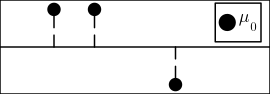

In [27]:
using Plots.Measures
plot!(plt_spikes, yrange=(-1.25, 1.25), grid=:none, ticks=:none, ylabel="", xlabel="", frame=:box, margins=-2mm, size=(200, 70) .* 0.9)#, bg=Colors.RGB(248 / 255, 245 / 255, 247 / 255))

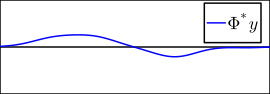

In [28]:
using Plots.Measures
plot!(plt_obs, yrange=(-1.25, 1.25), grid=:none, ticks=:none, ylabel="", xlabel="", frame=:box, margins=-2mm, size=(200, 70) .* 0.9)#, bg=Colors.RGB(248 / 255, 245 / 255, 247 / 255))

In [ ]:
# savefig(plt_spikes, "../../figures/1D/Spikes.svg")
# savefig(plt_obs, "../../figures/1D/Observations.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\1D\\Observations.svg"